**Importing the Libraries & Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

Dataset link - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/heart.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print(df.shape)
df.columns

(918, 12)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# looking for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

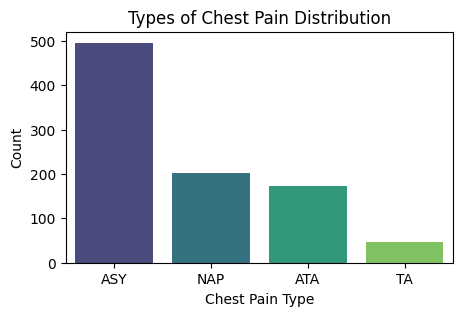

In [ ]:
# visualize different types of Chest Pain
chest_pain_count = df['ChestPainType'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=chest_pain_count.index, y=chest_pain_count, palette='viridis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Types of Chest Pain Distribution')
plt.show()

Here, we visualize the relationship between the "ChestPainType" and "HeartDisease" columns using a stacked bar chart.

<Figure size 700x500 with 0 Axes>

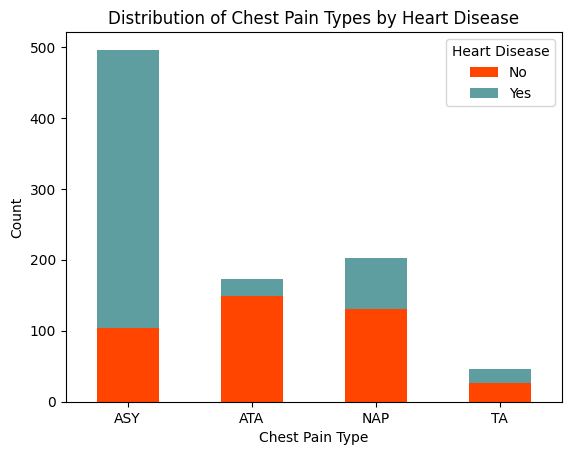

In [ ]:
cp_hd_counts = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
plt.figure(figsize=(7, 5))
cp_hd_counts.plot(kind='bar', stacked=True, color=['orangered', 'cadetblue'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types by Heart Disease')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

Here, we visualize the relationship between the "Sex" and "HeartDisease" columns using a bar chart.

<Figure size 700x500 with 0 Axes>

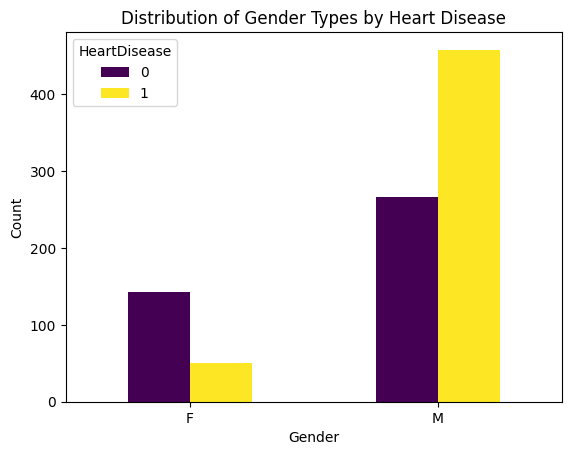

In [ ]:
gender_heart_disease_counts = pd.crosstab(df['Sex'], df['HeartDisease'])
plt.figure(figsize=(7, 5))
gender_heart_disease_counts.plot(kind='bar', cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender Types by Heart Disease')
plt.xticks(rotation=0)
plt.show()

Here, a stacked bar chart is used to show the connection between the "Age" and "HeartDisease" columns.

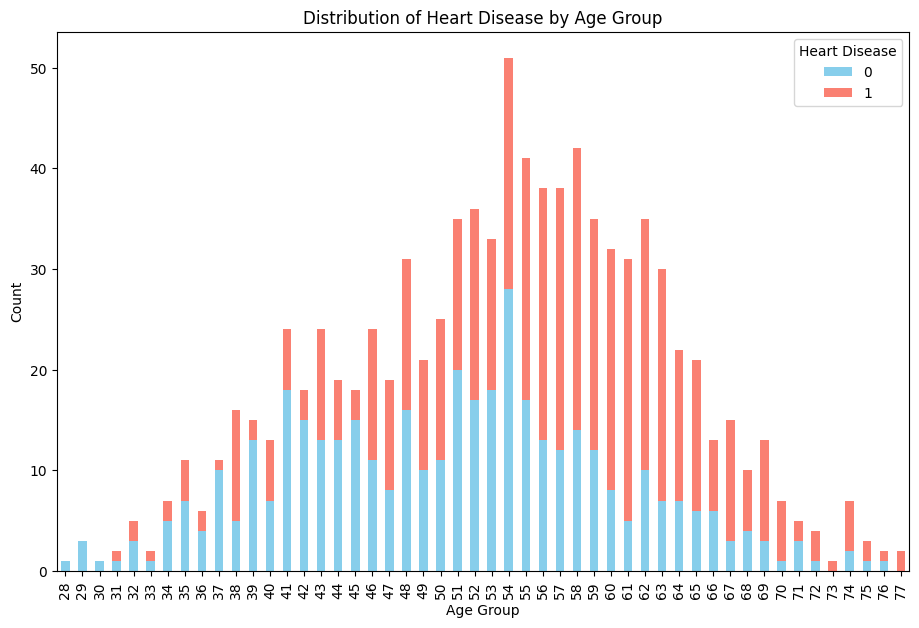

In [ ]:
age_heart_disease_counts = pd.crosstab(df['Age'], df['HeartDisease'])
fig, ax = plt.subplots(figsize=(11, 7))
age_heart_disease_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Age Group')
plt.legend(title='Heart Disease', labels=[0, 1])
plt.show()

<Axes: >

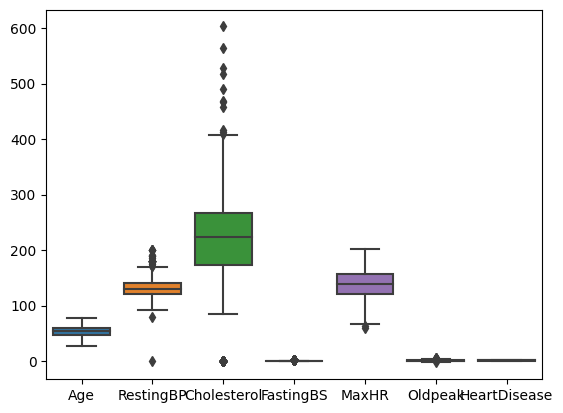

In [ ]:
sns.boxplot(data=df, orient='v')

**Data Preprocessing**

In [ ]:
df_1 = df.copy()

In [ ]:
df_1['Sex'] = label.fit_transform(df_1['Sex'])    #transfrom the strings in numeric values
df_1['Sex'].unique()

df_1['ChestPainType'] = label.fit_transform(df_1['ChestPainType'])
df_1['ChestPainType'].unique()

df_1['RestingECG'] = label.fit_transform(df_1['RestingECG'])
df_1['RestingECG'].unique()

df_1['ExerciseAngina'] = label.fit_transform(df_1['ExerciseAngina'])
df_1['ExerciseAngina'].unique()

df_1['ST_Slope'] = label.fit_transform(df_1['ST_Slope'])
df_1['ST_Slope'].unique()

array([2, 1, 0])

In [ ]:
min_val = df_1.min()
print(min_val)

Age               28.0
Sex                0.0
ChestPainType      0.0
RestingBP          0.0
Cholesterol        0.0
FastingBS          0.0
RestingECG         0.0
MaxHR             60.0
ExerciseAngina     0.0
Oldpeak           -2.6
ST_Slope           0.0
HeartDisease       0.0
dtype: float64


In [ ]:
max_val = df_1.max()
print(max_val)

Age                77.0
Sex                 1.0
ChestPainType       3.0
RestingBP         200.0
Cholesterol       603.0
FastingBS           1.0
RestingECG          2.0
MaxHR             202.0
ExerciseAngina      1.0
Oldpeak             6.2
ST_Slope            2.0
HeartDisease        1.0
dtype: float64


In [ ]:
std_val = df_1.std()
print(std_val)

Age                 9.432617
Sex                 0.407701
ChestPainType       0.956519
RestingBP          18.514154
Cholesterol       109.384145
FastingBS           0.423046
RestingECG          0.631671
MaxHR              25.460334
ExerciseAngina      0.490992
Oldpeak             1.066570
ST_Slope            0.607056
HeartDisease        0.497414
dtype: float64


In [ ]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [ ]:
df_1.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<Axes: >

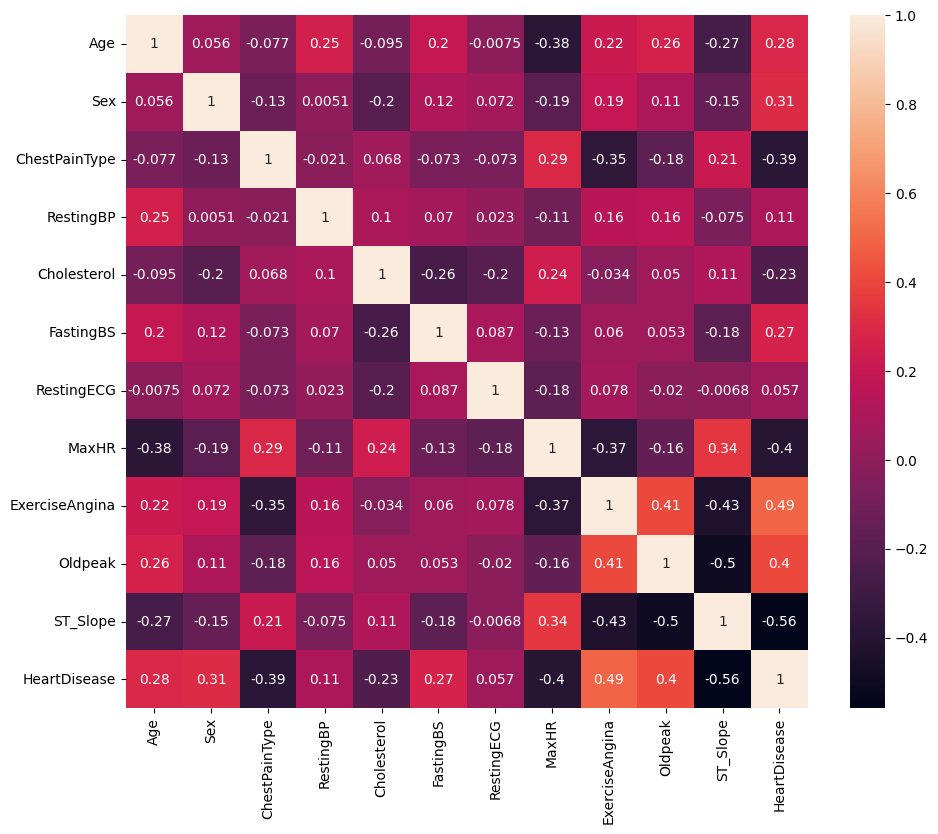

In [ ]:
plt.figure(figsize=(11,9))
sns.heatmap(df_1.corr(), annot=True, cmap='rocket')

<Figure size 500x300 with 0 Axes>

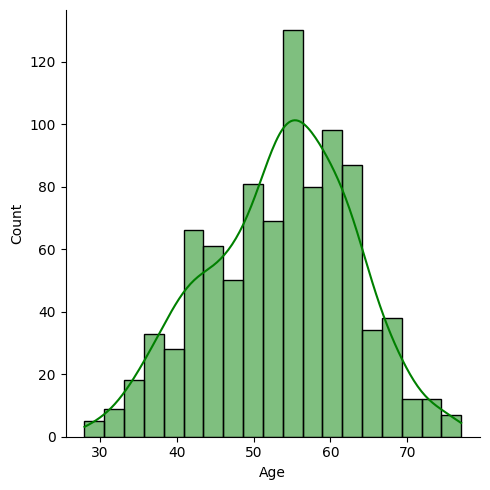

<Figure size 500x300 with 0 Axes>

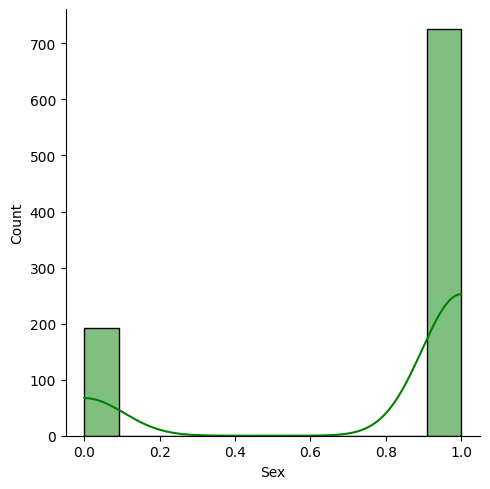

<Figure size 500x300 with 0 Axes>

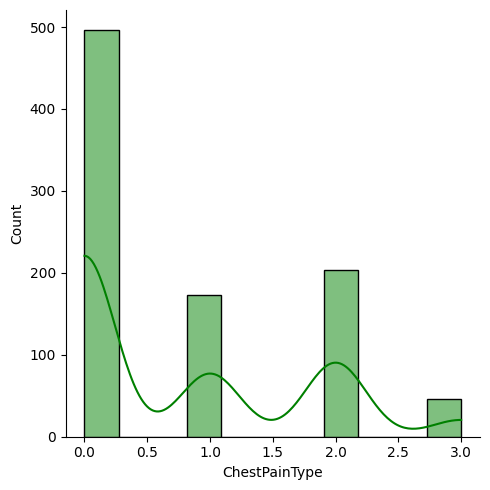

<Figure size 500x300 with 0 Axes>

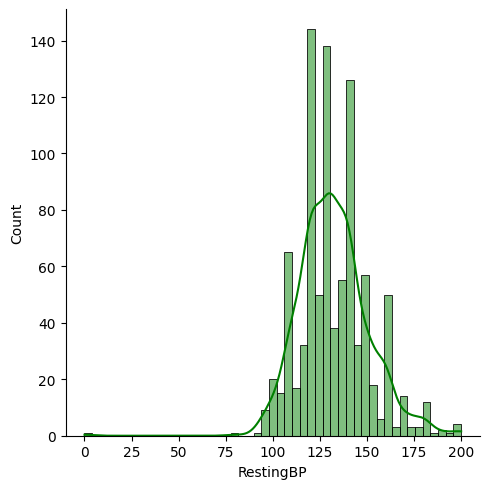

<Figure size 500x300 with 0 Axes>

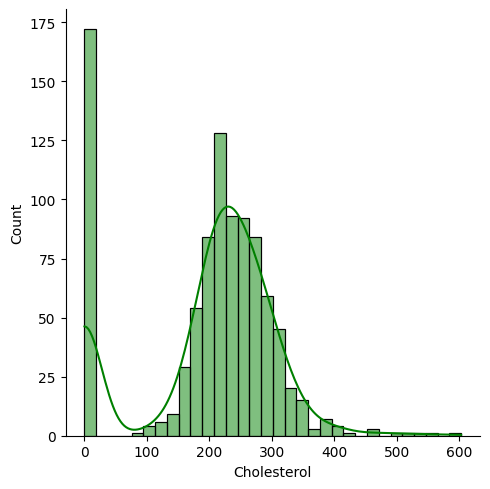

<Figure size 500x300 with 0 Axes>

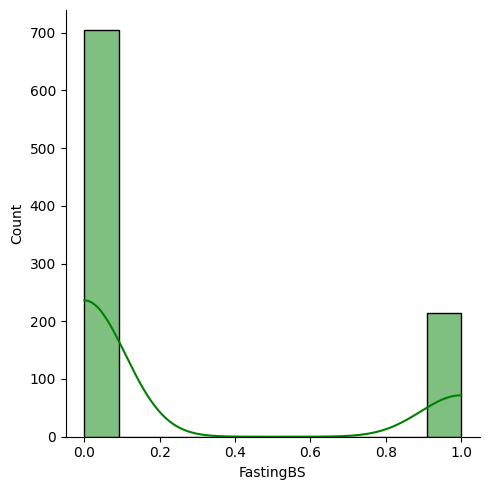

<Figure size 500x300 with 0 Axes>

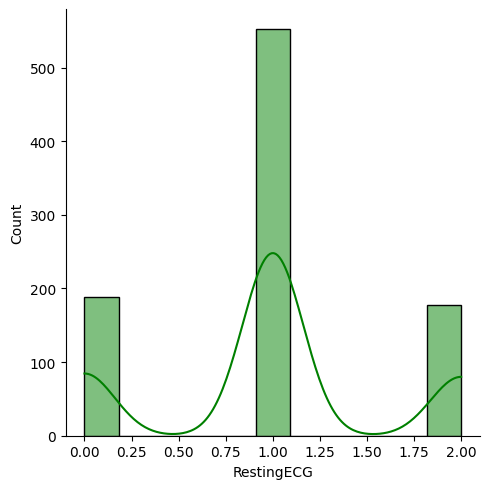

<Figure size 500x300 with 0 Axes>

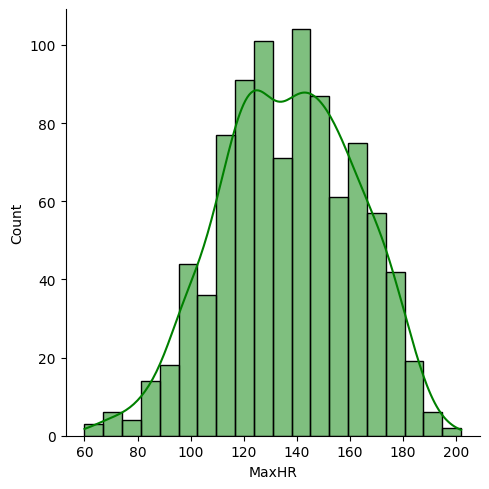

<Figure size 500x300 with 0 Axes>

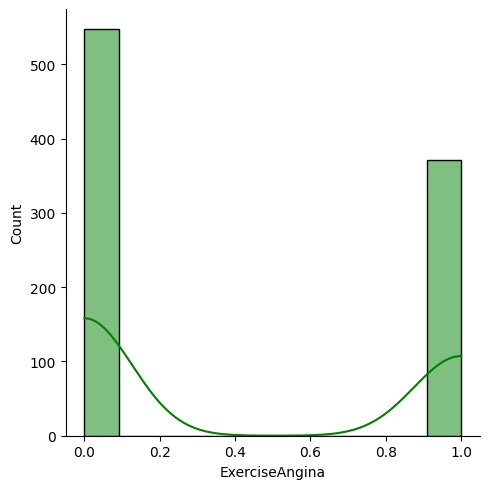

<Figure size 500x300 with 0 Axes>

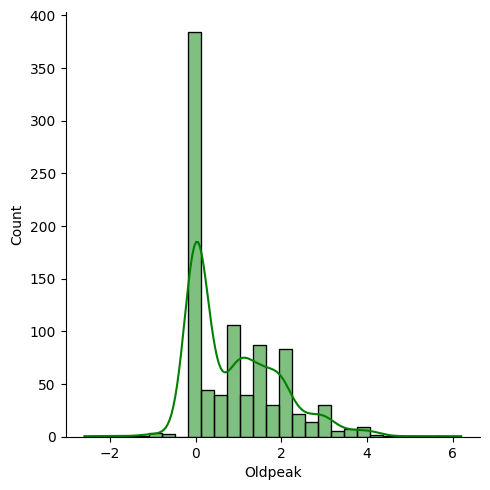

<Figure size 500x300 with 0 Axes>

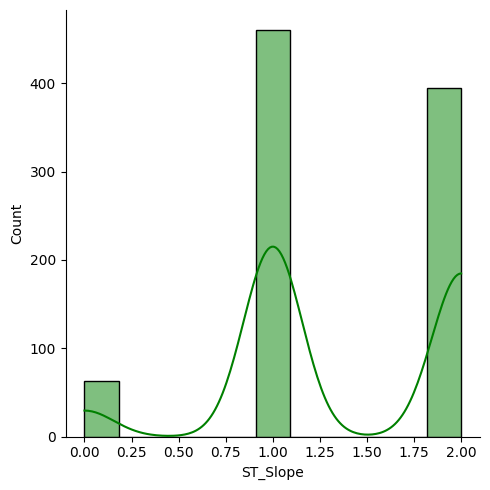

<Figure size 500x300 with 0 Axes>

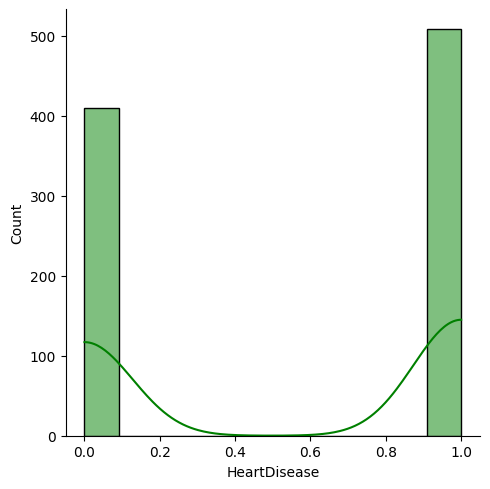

In [ ]:
for c in df_1.columns:
    plt.figure(figsize=(5,3))
    sns.displot(data=df_1[c], kde= True, color='green')
    plt.show()

In [ ]:
x = df_1.drop('HeartDisease', axis=1)
y = df_1['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
s_scaler.fit(x)
scaled_x = s_scaler.transform(x)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(scaled_x, y, test_size =0.25, random_state=42)

Model Training

In [ ]:
# Support vector machine
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100],
             'gamma': [0.25, 0.75, 0.5, 1],
             'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(scaled_x, y)
grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.826 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.804 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.853 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.836 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.776 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.853 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.918 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.717 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.721 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.25, kernel=poly;, score=0.788 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.25, kernel=poly

{'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}

In [ ]:
svm = SVC(C=1, gamma=0.25, kernel='rbf')
svm_y_pre = cross_val_predict(svm, scaled_x, y, cv=10)
svm_as = accuracy_score(y, svm_y_pre) * 100
svm_as = "{:.2f}".format(svm_as)
print('Accuracy of SVM: ', svm_as)

print("Classification Report:")
print(classification_report(y, svm_y_pre))

Accuracy of SVM:  86.06
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       410
           1       0.84      0.92      0.88       508

    accuracy                           0.86       918
   macro avg       0.87      0.85      0.86       918
weighted avg       0.86      0.86      0.86       918



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_y_pre = cross_val_predict(nb, scaled_x, y, cv=10)
nb_as = accuracy_score(y, nb_y_pre) * 100
nb_as = "{:.2f}".format(nb_as)
print('Accuracy of NB: ', nb_as)

print("Classification Report:")
print(classification_report(y, nb_y_pre))

Accuracy of NB:  84.53
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       410
           1       0.86      0.86      0.86       508

    accuracy                           0.85       918
   macro avg       0.84      0.84      0.84       918
weighted avg       0.85      0.85      0.85       918



In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn_y_pre = cross_val_predict(kn, scaled_x, y, cv=10)
kn_as = accuracy_score(y, kn_y_pre) * 100
kn_as = "{:.2f}".format(kn_as)
print('Accuracy of KNN: ', kn_as)

print("Classification Report:")
print(classification_report(y, kn_y_pre))

Accuracy of KNN:  85.62
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       410
           1       0.87      0.87      0.87       508

    accuracy                           0.86       918
   macro avg       0.85      0.86      0.85       918
weighted avg       0.86      0.86      0.86       918



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf_y_pre = cross_val_predict(rf, scaled_x, y, cv=10)
rf_as = accuracy_score(y, rf_y_pre) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF: ",rf_as)

print("Classification Report:")
print(classification_report(y, rf_y_pre))

Accuracy of RF:  84.97
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       410
           1       0.85      0.88      0.87       508

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_y_pre = cross_val_predict(lg, scaled_x, y, cv=10)
lg_as = accuracy_score(y, lg_y_pre) * 100
lg_as = "{:.2f}".format(lg_as)
print('Accuracy of LG: ', lg_as)

print("Classification Report:")
print(classification_report(y, lg_y_pre))

Accuracy of LG:  83.12
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       410
           1       0.85      0.84      0.85       508

    accuracy                           0.83       918
   macro avg       0.83      0.83      0.83       918
weighted avg       0.83      0.83      0.83       918



In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab_y_pre = cross_val_predict(ab, scaled_x, y, cv=10)
ab_as = accuracy_score(y, ab_y_pre) * 100
ab_as = "{:.2f}".format(ab_as)
print('Accuracy of AdaBoost: ', ab_as)

print("Classification Report: ")
print(classification_report(y, ab_y_pre))

Accuracy of AdaBoost:  85.08
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       410
           1       0.86      0.87      0.87       508

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918



In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb_y_pre = cross_val_predict(gb, scaled_x, y, cv=10)
gb_as = accuracy_score(y, gb_y_pre) * 100
gb_as = "{:.2f}".format(gb_as)
print("Accuracy of Gradient Boost: ", gb_as)

Accuracy of Gradient Boost:  85.19


In [ ]:
# XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg_y_pre = cross_val_predict(xg, scaled_x, y, cv=10)
xg_as = accuracy_score(y, xg_y_pre) * 100
xg_as = "{:.2f}".format(xg_as)
print("Accuracy of XGBoost: ", xg_as)

Accuracy of XGBoost:  84.20


In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla = VotingClassifier(estimators=[('RF', rf), ('AdB', ab)], voting='soft')
two_cla.fit(X_train, Y_train)
pred = two_cla.predict(X_test)
ac_two_cla = accuracy_score(Y_test, pred) * 100
ac_two_cla = "{:.2f}".format(ac_two_cla)
print("Accuracy:", ac_two_cla)
print(classification_report(Y_test, pred))

Accuracy: 89.13
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        98
           1       0.91      0.90      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla_2 = VotingClassifier(estimators=[('GB', gb), ('XGB', xg)], voting='soft')
two_cla_2.fit(X_train, Y_train)
pred_2 = two_cla_2.predict(X_test)
ac_two_cla_2 = accuracy_score(Y_test, pred_2) * 100
ac_two_cla_2 = "{:.2f}".format(ac_two_cla_2)
print("Accuracy:", ac_two_cla_2)
print(classification_report(Y_test, pred_2))

Accuracy: 89.13
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        98
           1       0.93      0.87      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla_3 = VotingClassifier(estimators=[('NB', nb), ('RF', rf)], voting='soft')
two_cla_3.fit(X_train, Y_train)
pred_3 = two_cla_3.predict(X_test)
ac_two_cla_3 = accuracy_score(Y_test, pred_3) * 100
ac_two_cla_3 = "{:.2f}".format(ac_two_cla_3)
print("Accuracy:", ac_two_cla_3)
print(classification_report(Y_test, pred_3))

Accuracy: 88.26
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        98
           1       0.91      0.88      0.90       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



Confusion matrix of GB+XGB


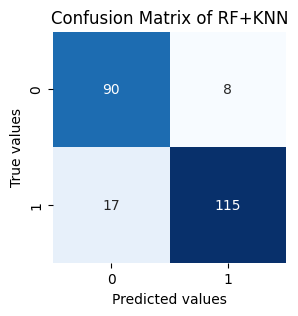

In [ ]:
print('Confusion matrix of GB+XGB')

cm = confusion_matrix(Y_test, pred_2)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of RF+KNN")
plt.show()

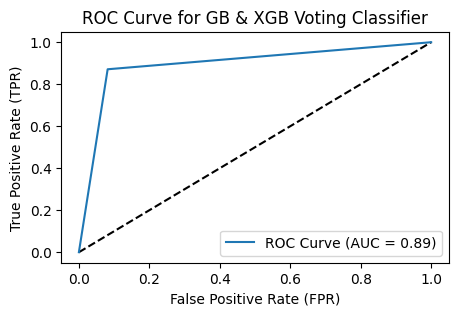

In [ ]:
# ROC/AUC curve
fpr, tpr, thresholds = roc_curve(Y_test, pred_2)
plt.figure(figsize=(5, 3))
two_cla_2_auc = roc_auc_score(Y_test, pred_2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(two_cla_2_auc))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for GB & XGB Voting Classifier')
plt.legend(loc='lower right')
plt.show()